In [1]:
import pandas as pd
import glob

In [2]:
folder_path = "DataSet\\"

all_files = glob.glob(folder_path + '*.csv')

dfs = []

for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

In [3]:
merged_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470379,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
470380,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
470381,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
470382,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [4]:
data = merged_df.copy()

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Sort DataFrame by 'Date'
data = data.sort_values('Date')

*Exploratory data analysis*:
1. Getting to know the data
2. Data preprocessing (Missing values)
3. Cross table and data visualization

***Getting to know the data***

In [5]:
#*****To check variables data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 470384 entries, 270686 to 470383
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                470384 non-null  datetime64[ns]
 1   Symbol              470384 non-null  object        
 2   Series              470384 non-null  object        
 3   Prev Close          470384 non-null  float64       
 4   Open                470384 non-null  float64       
 5   High                470384 non-null  float64       
 6   Low                 470384 non-null  float64       
 7   Last                470384 non-null  float64       
 8   Close               470384 non-null  float64       
 9   VWAP                470384 non-null  float64       
 10  Volume              470384 non-null  object        
 11  Turnover            470384 non-null  float64       
 12  Trades              240688 non-null  float64       
 13  Deliverable Volume  438230 no

In [6]:
#*****Check for missing values
data.isnull()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
270686,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
422348,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
440734,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
454467,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
106895,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150693,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40956,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
450179,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                229696
Deliverable Volume     32154
%Deliverble            32154
dtype: int64


In [8]:
#*****Subsetting the rows that have one or more missing values
missing = data[data.isnull().any(axis=1)]

### Two ways of approach:
1. Fill the missing values by mean/ median, in case of numerical variable.
2. Fill the missing values with the class which has maximum count, in case of categorical variable.

* Look at the description to know whether numerical variables should be imputed with mean or median.
* Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [9]:
data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Turnover,Trades,Deliverable Volume,%Deliverble
count,470384,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,4.703840e+05,2.406880e+05,4.382300e+05,438230.000000
mean,2011-05-22 13:18:08.975815168,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.132300,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
min,2000-01-03 00:00:00,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,2006-07-03 00:00:00,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.697500,1.612816e+13,2.183400e+04,1.253825e+05,0.364700
50%,2011-08-19 00:00:00,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.940000,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,2016-06-24 00:00:00,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.662500,1.863835e+14,7.893550e+04,1.452238e+06,0.638400
max,2021-04-30 00:00:00,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,3.564334e+16,1.643015e+06,2.325307e+08,1.000000
std,NaN,2581.367576,2585.256861,2619.646432,2546.618689,2581.389799,2582.138197,2582.697234,3.298082e+14,6.866443e+04,2.831667e+06,0.190019


In [10]:
#*****Calculating the mean value of the Trades variable
data['Trades'].median()

44068.0

In [11]:
#*****To fill NA/NaN values using the specified value.
data['Trades'].fillna(data['Trades'].median(), inplace=True)

In [12]:
#*****Calculating the mean value of the 'Deliverable Volume' variable.
data['Deliverable Volume'].mean()

1315098.408342651

In [13]:
#*****To fill NA/NaN values using the specified value.
data['Deliverable Volume'].fillna(data['Deliverable Volume'].mean(), inplace=True)

In [14]:
#*****Calculating the mean value of the '%Deliverable' variable.
data['%Deliverble'].mean()

0.5029968486867626

In [15]:
#*****To fill NA/NaN values using the specified value.
data['%Deliverble'].fillna(data['%Deliverble'].mean(), inplace=True)

In [16]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [17]:
data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Turnover,Trades,Deliverable Volume,%Deliverble
count,470384,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,470384.000000,4.703840e+05,4.703840e+05,4.703840e+05,470384.000000
mean,2011-05-22 13:18:08.975815168,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.132300,1.610138e+14,5.322524e+04,1.315098e+06,0.502997
min,2000-01-03 00:00:00,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,2006-07-03 00:00:00,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.697500,1.612816e+13,4.288900e+04,1.434068e+05,0.377300
50%,2011-08-19 00:00:00,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.940000,6.832603e+13,4.406800e+04,5.870155e+05,0.502997
75%,2016-06-24 00:00:00,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.662500,1.863835e+14,4.528125e+04,1.336903e+06,0.628400
max,2021-04-30 00:00:00,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,3.564334e+16,1.643015e+06,2.325307e+08,1.000000
std,NaN,2581.367576,2585.256861,2619.646432,2546.618689,2581.389799,2582.138197,2582.697234,3.298082e+14,4.992505e+04,2.733171e+06,0.183410


In [18]:
data.describe(include="O")

,Symbol,Series,Volume
count,470384,470384,470384
unique,65,1,220434
top,IOC,EQ,100
freq,10612,470384,62


In [19]:
data['Symbol'].value_counts()

Symbol
IOC           10612
HDFC          10612
WIPRO         10612
SBIN          10612
SUNPHARMA     10612
              ...  
MUNDRAPORT     2046
TELCO          1998
KOTAKMAH       1004
SSLT            776
JSWSTL          246
Name: count, Length: 65, dtype: int64

In [20]:
data['Series'].value_counts()

Series
EQ    470384
Name: count, dtype: int64

In [21]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [22]:
data1 = data.reset_index()['Close']

In [23]:
data1.shape

(470384,)

In [24]:
data1

0          270.85
1          216.75
2          155.70
3          116.35
4           28.95
           ...   
470379     752.55
470380     220.05
470381    3449.00
470382    6278.95
470383     185.60
Name: Close, Length: 470384, dtype: float64

[]

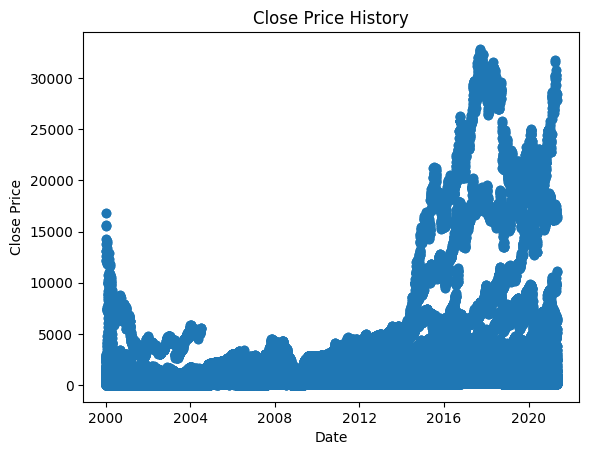

In [25]:
#Visualize the closing price history
plt.scatter(data['Date'], data['Close'])
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot()

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))

In [27]:
data1.shape

(470384, 1)

In [28]:
print(data1)

[[0.00796584]
 [0.0063191 ]
 [0.00446081]
 ...
 [0.10470493]
 [0.19084522]
 [0.00537093]]


In [29]:
#Splitting dataset into train and test set
training_size = int(len(data1)*0.7)
test_size = len(data1) - training_size
train_data, test_data = data1[0:training_size,:], data1[training_size:len(data1),:1]

In [30]:
training_size, test_size

(329268, 141116)

In [31]:
len(train_data), len(test_data)

(329268, 141116)

In [32]:
train_data

array([[0.00796584],
       [0.0063191 ],
       [0.00446081],
       ...,
       [0.00796431],
       [0.10810646],
       [0.03270193]])

In [33]:
test_data

array([[0.02965196],
       [0.01109647],
       [0.33696062],
       ...,
       [0.10470493],
       [0.19084522],
       [0.00537093]])

In [34]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ### i=0, 0,1,2,3,....,99
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [35]:
# reshape into X=t, t+1, t+2, t+3, and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [36]:
print(X_test)

[[0.02965196 0.01109647 0.33696062 ... 0.00985913 0.18493705 0.0404273 ]
 [0.01109647 0.33696062 0.03063361 ... 0.18493705 0.0404273  0.07775897]
 [0.33696062 0.03063361 0.16909061 ... 0.0404273  0.07775897 0.05347642]
 ...
 [0.04454263 0.04083518 0.04083518 ... 0.02895491 0.02148219 0.02262821]
 [0.04083518 0.04083518 0.04107717 ... 0.02148219 0.02262821 0.00641954]
 [0.04083518 0.04107717 0.09454597 ... 0.02262821 0.00641954 0.10470493]]


In [37]:
print(X_train.shape), print(y_train.shape)

(329167, 100)
(329167,)


(None, None)

In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [39]:
### create the stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Dense, LSTM

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\shyam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
5144/5144 ━━━━━━━━━━━━━━━━━━━━ 588s 113ms/step - loss: 0.0011 - val_loss: 0.0171
Epoch 2/100
5144/5144 ━━━━━━━━━━━━━━━━━━━━ 591s 115ms/step - loss: 0.0011 - val_loss: 0.0171
Epoch 3/100
 701/5144 ━━━━━━━━━━━━━━━━━━━━ 7:44 104ms/step - loss: 0.0011

KeyboardInterrupt: 

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
### Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)